In [1]:
#importo librerias y llamo a la API de alpha vantage, para obtener datos de cotizaciones en tiempo real
#los datos estan expresados en ditintas frecuencias de tiempo
#el ultimo dato disponible es el de precio y volumen negociado el ultimo dia habil 

import scipy
import pandas_datareader
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from pandas_datareader import data as pdr
import alpha_vantage as av
from alpha_vantage.timeseries import TimeSeries

In [24]:
#importo serie de tiempo de la accion que me interesa investigar. Elegi en este caso la accion de Google

from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='L8F3VYHBAHQXS6Y1')
serie, meta_data = ts.get_intraday('GOOGL')


In [3]:
#importo serie de tiempo de otra accion que me interesa investigar. Elegi en este caso la accion de Amazon

from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='L8F3VYHBAHQXS6Y1')
serie2, meta_data = ts.get_intraday('AMZN')


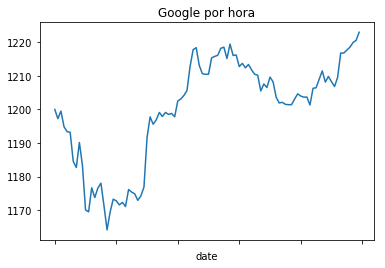

In [17]:
#grafico los valores de la serie de Google intradiaria por hora 
#eligiendo el parametro outputsize='compact' estoy tomando los ultimos 100 datos; esto me permite optimizar cada llamado a la API
#outputsize='full' me arrojaria la serie historica completa

ts = TimeSeries(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
serie, meta_data = ts.get_intraday(symbol='GOOGL',interval='60min', outputsize='compact')
serie['4. close'].plot()
plt.title('Google por hora')
plt.show()



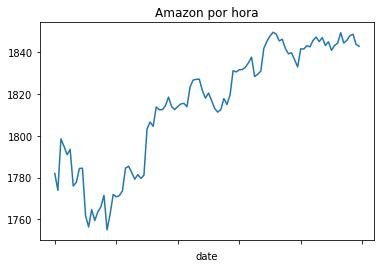

In [12]:
#grafico los valores de la serie de Amazon intradiaria por hora 
#eligiendo el parametro outputsize='compact' estoy tomando los ultimos 100 datos; esto me permite optimizar cada llamado a la API
#outputsize='full' me arrojaria la serie historica completa

ts = TimeSeries(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
serie2, meta_data = ts.get_intraday(symbol='AMZN',interval='60min', outputsize='compact')
serie2['4. close'].plot()
plt.title('Amazon por hora')
plt.show()

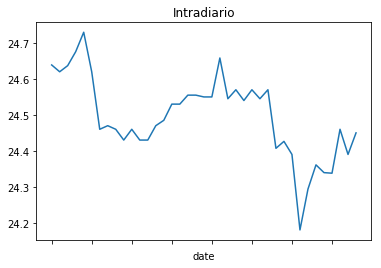

In [64]:
ts = TimeSeries(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
serie2, meta_data = ts.get_intraday(symbol='DAX',interval='1min', outputsize='full')
serie2['4. close'].plot()
plt.title('Intradiario')
plt.show()

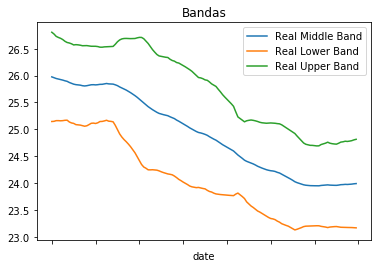

In [32]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='DAX', interval='60min', time_period=60)
data.plot()
plt.title('Bandas')
plt.show()

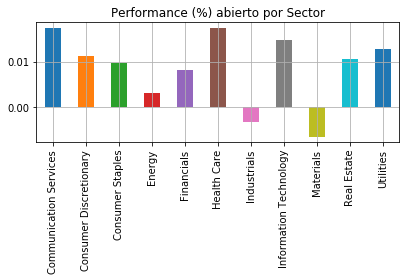

In [33]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Performance (%) abierto por Sector')
plt.tight_layout()
plt.grid()
plt.show()

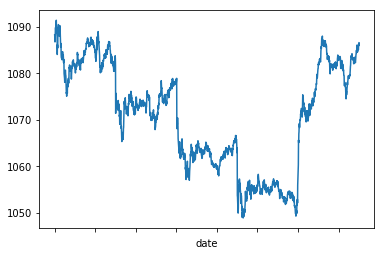

In [34]:
serie['4. close'].plot()

In [35]:
y = np.where(serie['4. close'].shift(-1) > serie['4. close'],1,-1)

In [36]:
y

array([-1, -1,  1, ..., -1,  1, -1])

In [37]:
serie.head(1)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-01-09 09:31:00,1088.91,1090.0,1088.3199,1088.3199,37295.0


In [38]:
serie['Open-Close'] = serie['1. open'] - serie['4. close']
serie['High-Low'] = serie['2. high'] - serie['3. low']
 
x=serie[['Open-Close','High-Low']]

In [39]:
serie.head(1)

,1. open,2. high,3. low,4. close,5. volume,Open-Close,High-Low
date,,,,,,,
2019-01-09 09:31:00,1088.91,1090.0,1088.3199,1088.3199,37295.0,0.5901,1.6801


In [40]:
split_percentage = 0.8
split = int(split_percentage*len(serie))
 
train_x = x[:split]
train_y = y[:split]
 
test_x = x[split:]
test_y = y[split:]

In [41]:
cls = SVC().fit(train_x, train_y)

/Users/susanamenendez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
accuracy_train = accuracy_score(train_y, cls.predict(train_x))
 
accuracy_test = accuracy_score(test_y, cls.predict(test_x))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 54.36%
Test Accuracy: 47.61%


In [44]:
serie['Predicted_Signal'] = cls.predict(x)
 

In [45]:
serie['Return'] = np.log(serie['4. close'].shift(-1) / serie['4. close'])*100


In [46]:
serie['Strategy_Return'] = serie['Return'] * serie['Predicted_Signal']


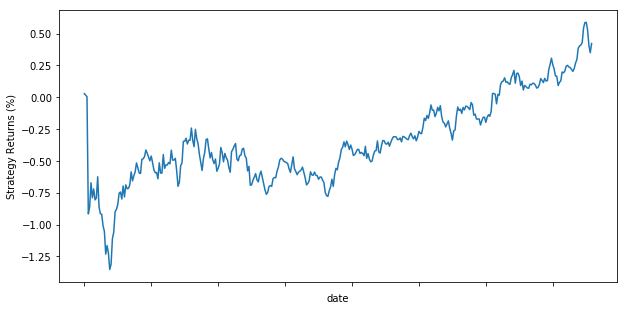

In [60]:
data['Strategy_Return'].iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
x.head()

,Open-Close,High-Low
date,,
2019-01-09 09:31:00,0.5901,1.6801
2019-01-09 09:32:00,1.6999,2.2899
2019-01-09 09:33:00,-0.4300,0.8401
2019-01-09 09:34:00,1.4035,1.4035
2019-01-09 09:35:00,-0.6644,0.6644


In [50]:
knn = KNeighborsClassifier(n_neighbors=15)


In [51]:
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [52]:
accuracy_train = accuracy_score(train_y, knn.predict(train_x))

In [53]:
accuracy_test = accuracy_score(test_y, knn.predict(test_x))

In [54]:
print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)



Train_data Accuracy: 0.58
Test_data Accuracy: 0.50


In [56]:
serie['Predicted_Signal_knn'] = knn.predict(x)

In [58]:
#SPY 
serie['SPY Returns'] = np.log(serie['4. close'] / serie['4. close'].shift(1))
Cumulative_SPY_Returns = serie[split:]['SPY Returns'].cumsum()*100

In [59]:
serie['Strategy_Returns'] = serie['SPY Returns'] * serie['Predicted_Signal_knn'].shift(1)


In [60]:
Cum_Strategy_Returns = serie[split:]['Strategy_Returns'].cumsum()*100



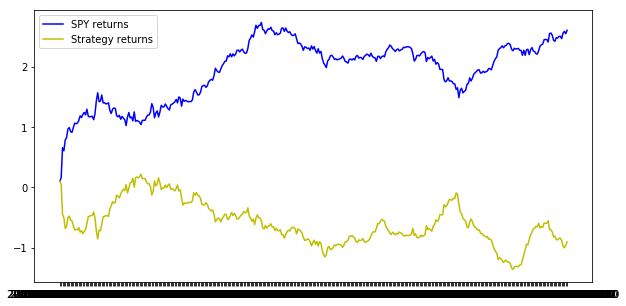

In [61]:
plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_Returns, color='b',label = 'SPY returns')
plt.plot(Cum_Strategy_Returns, color='y',label = 'Strategy returns')
plt.legend()
plt.show()


In [62]:
Std = Cum_Strategy_Returns.std()
Sharpe = (Cum_Strategy_Returns - Cumulative_SPY_Returns)/Std
Sharpe=Sharpe.mean()
print('Sharpe ratio: %.2f' %Sharpe)

Sharpe ratio: -7.26
